# 목차
---

## 1. cars.csv와 brand.csv의 데이터 합치기
## 2. 카테고리형 변수를 숫자 형태로 변환하기
## 3. 결측치 처리하기
## 4. 스케일링 및 PCA 비교
## 5. 회고


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
car_df = pd.read_csv('/aiffel/data/cars.csv')

In [3]:
brand_df = pd.read_csv('/aiffel/data/brand.csv')

## 1. cars.csv와 brand.csv의 데이터 합치기

In [4]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [5]:
brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


두 데이터에 공통으로 'title' column이 있지만 서로 이름이 다르게 집계된 것으로 확인 <br/>
car_df 에는 대문자, 회사명 + 차종 <br/>
brand_df 에는 소문자, 회사이름만 정의 <br/>
<br/>
1. car_df의 'title'을 띄어쓰기 기준 title + model로 분리
2. brand_df를 대문자로 변경
3. 두 데이터 title 기준 merge 병합

In [6]:
# 1. car_df title split
car_split = car_df['title'].str.split(expand = True)

In [7]:
car_split.head()

,0,1,2,3,4,5,6
0,SKODA,FABIA,None,None,None,None,None
1,VAUXHALL,CORSA,None,None,None,None,None
2,HYUNDAI,I30,None,None,None,None,None
3,MINI,HATCH,None,None,None,None,None
4,VAUXHALL,CORSA,None,None,None,None,None


생각과 다르게 6등분으로 나누어져 index[0]은 title로 저장 후 나머지 [1]~[6]은 합쳐 model로 저장

In [8]:
car_df['title'] = car_split[0]

In [9]:
# car_df에 model 추가
car_df['Model']  = car_split[[1, 2, 3, 4, 5, 6]].apply(lambda x: ''.join(x.dropna().astype(str)), axis = 1)

In [10]:
car_df['Model']

0         FABIA
1         CORSA
2           I30
3         HATCH
4         CORSA
         ...   
3682     MEGANE
3683         A4
3684    3SERIES
3685     ACCORD
3686      CORSA
Name: Model, Length: 3687, dtype: object

In [11]:
# 2. brand title 대문자화
brand_df['title'] = brand_df['title'].str.upper()

In [12]:
# 3. car_df + brand_df 병합
car_df = car_df.merge(brand_df, on='title', how = 'left')

In [13]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Model,country
0,SKODA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,FABIA,Czech Republic
1,VAUXHALL,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,CORSA,United Kingdom
2,HYUNDAI,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,I30,South Korea
3,MINI,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,HATCH,United Kingdom
4,VAUXHALL,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,CORSA,United Kingdom


## 2. 카테고리형 변수를 숫자 형태로 변환하기

In [14]:
car_df['Emission Class'].value_counts()

Euro 5    1257
Euro 6    1109
Euro 4    1068
Euro 3     137
Euro 2      25
Euro 1       4
Name: Emission Class, dtype: int64

In [15]:
car_df['Engine'].value_counts()

1.6L    736
2.0L    553
1.2L    521
1.4L    421
1.0L    326
1.5L    294
1.3L    170
1.8L    158
3.0L     79
2.2L     75
2.1L     63
1.1L     39
1.7L     35
2.5L     33
1.9L     31
2.4L     28
0.9L     15
2.7L     11
3.5L     10
3.2L      7
3.7L      5
4.4L      5
2.3L      4
2.6L      4
4.2L      4
5.0L      3
2.8L      3
0.8L      2
4.3L      2
5.5L      1
4.8L      1
3.1L      1
3.3L      1
6.3L      1
Name: Engine, dtype: int64

1. 'Emission Class' : Euro + 숫자, Euro가 중복으로 들어가며 숫자로 정렬되어 있어 Euro를 제거하여 숫자로 변환
2. Engine : 숫자 + L, L만 제거하여 숫자로 변환

In [16]:
# 1. 'Emission Class' 띄어쓰기 기준 index 1만 저장
car_df['Emission Class'] = car_df['Emission Class'].str.split(expand = True)[1]

In [17]:
car_df['Emission Class']

0       6
1       4
2       5
3       4
4       5
       ..
3682    4
3683    5
3684    5
3685    4
3686    5
Name: Emission Class, Length: 3687, dtype: object

In [18]:
# 2. 'Engine' 뒤에 L만 제거 후 저장
car_df['Engine'] = car_df['Engine'].str.replace('L','').astype(float)

In [19]:
car_df['Engine']

0       1.4
1       1.2
2       1.4
3       1.4
4       1.3
       ... 
3682    1.6
3683    2.0
3684    2.0
3685    2.2
3686    1.2
Name: Engine, Length: 3687, dtype: float64

## 3. 결측치 처리하기

In [20]:
car_df.isna().sum()

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
Model                   0
country                 0
dtype: int64

결측이 많은 순서대로 확인하며 진행해보겠습니다.

In [21]:
# 1. Service history 결측 확인
car_df['Service history'].value_counts()

Full    540
Name: Service history, dtype: int64

결측치 보완을 유추할 수 있는 내용이 없어 Unknown으로 보완

In [22]:
car_df['Service history'].fillna('Unknown', inplace = True)

In [23]:
# 2. Previous Owners 결측 확인
car_df['Previous Owners'].value_counts()

2.0    594
1.0    523
3.0    475
4.0    360
5.0    208
6.0     60
7.0     39
8.0     12
9.0      5
Name: Previous Owners, dtype: int64

In [24]:
car_df.corr()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats
Price,1.000000,-0.500358,0.722971,-0.479424,-0.022692,0.113335,-0.027393
Mileage(miles),-0.500358,1.000000,-0.410781,0.316160,0.331722,-0.037024,0.095271
Registration_Year,0.722971,-0.410781,1.000000,-0.501045,-0.290452,0.219365,0.037166
Previous Owners,-0.479424,0.316160,-0.501045,1.000000,0.195676,-0.153262,-0.029338
Engine,-0.022692,0.331722,-0.290452,0.195676,1.000000,-0.061935,0.072934
Doors,0.113335,-0.037024,0.219365,-0.153262,-0.061935,1.000000,0.497160
Seats,-0.027393,0.095271,0.037166,-0.029338,0.072934,0.497160,1.000000


가장 연관성이 높은 Registration_Year을 활용하여 보완해보겠습니다.

In [25]:
# Registration Year 마다의 가장 일반적인 Previous Owners를 mode_per_year으로 저장
mode_per_year = car_df.groupby('Registration_Year')['Previous Owners'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
)

# Previous Owners의 누락값에 mode_per_year 값을 리턴
def impute_previous_owners(row):
    if pd.isnull(row['Previous Owners']):
        # Return the mode if it's not NaN
        return mode_per_year.get(row['Registration_Year'], np.nan)
    else:
        return row['Previous Owners']

# car_df['Previous Owners']에 저장
car_df['Previous Owners'] = car_df.apply(impute_previous_owners, axis=1)

In [26]:
#남은 결측 비율 확인
car_df.isna().mean()

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.001627
Fuel type            0.000000
Body type            0.000000
Engine               0.012205
Gearbox              0.000000
Doors                0.006781
Seats                0.009493
Emission Class       0.023596
Service history      0.000000
Model                0.000000
country              0.000000
dtype: float64

In [27]:
# 3. doors, seats 결측치 채우기 (동일 model = 동일 doors, seats 추정)
car_df.groupby('Model')['Doors'].describe()

,count,mean,std,min,25%,50%,75%,max
Model,,,,,,,,
1007,2.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
107,12.0,3.833333,1.029857,3.0,3.0,3.0,5.0,5.0
108,5.0,4.600000,0.894427,3.0,5.0,5.0,5.0,5.0
1SERIES,55.0,4.363636,1.077783,2.0,3.0,5.0,5.0,5.0
2,1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
Z4,3.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
ZAFIRA,15.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0
ZAFIRATOURER,7.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0


In [28]:
car_df.groupby('Model')['Seats'].describe()

,count,mean,std,min,25%,50%,75%,max
Model,,,,,,,,
1007,2.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0
107,12.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0
108,5.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0
1SERIES,55.0,4.890909,0.314627,4.0,5.0,5.0,5.0,5.0
2,1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
Z4,3.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
ZAFIRA,15.0,7.000000,0.000000,7.0,7.0,7.0,7.0,7.0
ZAFIRATOURER,7.0,7.000000,0.000000,7.0,7.0,7.0,7.0,7.0


동일 모델에도 다른 값인 경우가 있어 median 값을 활용하여 채워넣겠습니다.

In [29]:
# doors 결측 중앙값으로 보완
median_doors_per_model = car_df.groupby('Model')['Doors'].transform('median')

In [30]:
car_df['Doors'] = car_df['Doors'].fillna(median_doors_per_model)

In [31]:
# Seats 결측 중앙값으로 보완
median_seats_per_model = car_df.groupby('Model')['Seats'].transform('median')

In [32]:
car_df['Seats'] = car_df['Seats'].fillna(median_seats_per_model)

In [33]:
#남은 결측 비율 확인
car_df.isna().mean()

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.001627
Fuel type            0.000000
Body type            0.000000
Engine               0.012205
Gearbox              0.000000
Doors                0.002170
Seats                0.005153
Emission Class       0.023596
Service history      0.000000
Model                0.000000
country              0.000000
dtype: float64

In [34]:
car_df.dropna(axis = 1 , inplace = True)

## 4. 스케일링

In [35]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [36]:
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

In [37]:
from sklearn.decomposition import PCA
pca = PCA()

### 4.1 원핫인코딩

In [38]:
car_df['Fuel type'].value_counts()

Petrol                   2362
Diesel                   1219
Petrol Hybrid              47
Electric                   31
Petrol Plug-in Hybrid      27
Diesel Hybrid               1
Name: Fuel type, dtype: int64

In [39]:
car_df['country'].value_counts()

Germany           863
United Kingdom    729
Japan             641
France            522
United States     439
South Korea       178
Italy             128
Czech Republic     63
Spain              60
Sweden             47
Romania            14
Malaysia            3
Name: country, dtype: int64

In [40]:
car_df['Body type'].value_counts()

Hatchback      2280
SUV             461
Saloon          368
Estate          171
MPV             153
Coupe           139
Convertible     109
Pickup            3
Combi Van         2
Minibus           1
Name: Body type, dtype: int64

In [41]:
car_df['Gearbox'].value_counts()

Manual       2870
Automatic     817
Name: Gearbox, dtype: int64

위 column들의 value counts가 100개를 넘지 않아 모두 원핫인코딩 진행

In [42]:
car_df = pd.get_dummies(car_df, columns = ['Fuel type', 'country', 'Body type', 'Gearbox','title'], drop_first = True)

In [43]:
car_df

,Price,Mileage(miles),Registration_Year,Service history,Model,Fuel type_Diesel Hybrid,Fuel type_Electric,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid,...,title_SEAT,title_SKODA,title_SMART,title_SSANGYONG,title_SUBARU,title_SUZUKI,title_TOYOTA,title_VAUXHALL,title_VOLKSWAGEN,title_VOLVO
0,6900,70189,2016,Unknown,FABIA,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1495,88585,2008,Full,CORSA,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,949,137000,2011,Unknown,I30,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2395,96731,2010,Full,HATCH,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000,85000,2013,Unknown,CORSA,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,1395,76202,2006,Unknown,MEGANE,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3683,6990,119000,2012,Unknown,A4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3684,3995,139000,2013,Unknown,3SERIES,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3685,1390,179190,2007,Full,ACCORD,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# 원핫인코딩을 진행하지 않은 문자열 데이터 drop
car_df.drop(['Service history', 'Model'],axis = 1 , inplace = True)

### 4.2 스텐다드 스케일링 및 PCA 시각화

In [45]:
# 스텐다드 스케일링
ss_df = ss.fit_transform(car_df)

In [46]:
#PCA
pca = PCA()
pca.fit(ss_df)

PCA()

In [47]:
pd.DataFrame(pca.transform(ss_df))

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,-0.380234,-0.531196,-0.271434,-0.408828,-0.019650,0.115899,-0.209748,0.142676,0.234691,-0.027077,...,-9.052964e-16,-1.337059e-15,6.698118e-16,-1.871831e-15,6.855000e-16,-7.228154e-16,-1.286600e-15,7.710824e-16,2.943055e-19,5.322746e-16
1,-2.009387,0.700862,-1.315218,2.388381,0.741878,0.255895,-0.482517,-0.158251,-0.273970,-0.040625,...,-5.875137e-17,5.245459e-17,3.436837e-16,-1.093515e-16,3.663109e-16,-1.538261e-16,-1.173963e-16,4.249850e-17,1.807055e-16,-4.322317e-16
2,-1.299664,-0.383999,0.388561,-0.612683,-0.260816,2.999238,3.650725,1.082688,-2.241480,0.231702,...,-5.791684e-16,3.837868e-16,-8.845005e-16,1.612654e-16,-4.663564e-16,-7.055933e-17,5.175125e-16,1.395583e-15,-6.797173e-16,-7.375430e-16
3,-1.870101,0.443834,-1.296723,2.124706,0.503426,0.160361,-0.413135,-0.100778,-0.192903,-0.042664,...,-9.399909e-16,-2.545915e-16,-3.155112e-16,-6.783408e-16,3.524331e-16,-4.280376e-17,-3.706660e-16,1.188263e-16,-3.188948e-16,-5.753141e-17
4,-1.532843,0.183711,-1.365667,2.102498,0.829880,0.437421,-0.730698,-0.198624,-0.141558,-0.111669,...,2.743155e-16,-1.140789e-16,2.326614e-16,1.682043e-16,3.324394e-17,6.821855e-17,-2.284186e-16,-2.905684e-16,2.917278e-16,-2.656982e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,-1.574872,0.476014,-0.382819,-2.289547,1.837200,-1.237658,-0.791140,0.010809,-0.707819,0.091281,...,-2.738571e-16,1.756200e-16,-4.542890e-16,6.678046e-16,2.969219e-16,-5.285263e-16,7.342325e-17,4.449544e-16,6.664281e-16,3.102300e-16
3683,2.774114,1.045153,-0.763578,0.247935,-0.634366,-0.414340,0.120060,0.251347,-0.224987,0.097507,...,4.477879e-16,-5.043916e-16,4.616449e-16,3.208599e-16,7.687667e-16,-1.000371e-15,7.342325e-17,5.629155e-16,4.582613e-16,2.061466e-16
3684,3.506849,1.196846,-0.596662,0.096405,-0.477860,-0.250999,-0.121086,0.194806,-0.226290,0.038888,...,6.975881e-16,2.727645e-16,-6.208225e-16,1.057542e-16,3.246775e-16,6.372078e-16,-1.147822e-15,-3.807740e-16,5.692836e-16,8.124646e-17
3685,0.531707,1.779468,3.385977,0.420857,1.519668,0.376406,-0.448263,0.130323,0.169467,0.024422,...,8.086104e-16,-2.268359e-16,-1.212221e-16,-2.203738e-16,-6.606454e-16,1.678042e-15,-3.706660e-16,3.963821e-16,2.084611e-16,6.779913e-16


In [48]:
#PCA 시각화
import matplotlib.pyplot as plt 

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

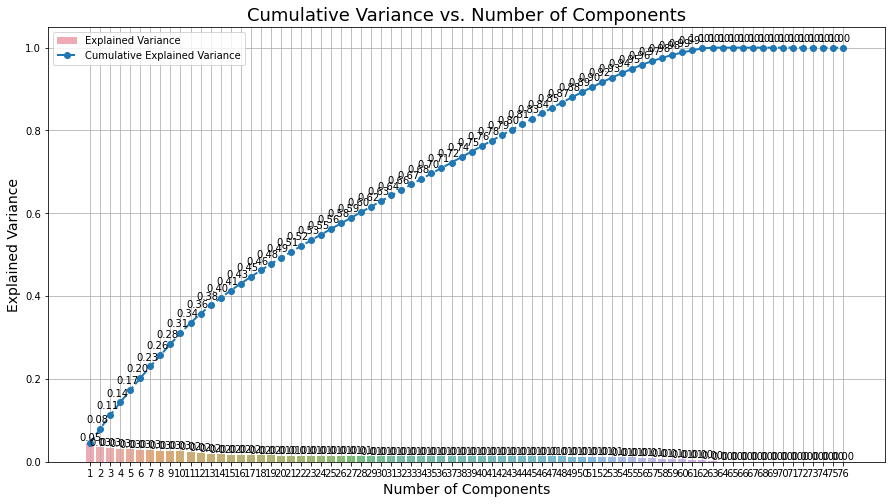

In [49]:
plt.figure(figsize=(15, 8)) 

# 각 성분의 설명된 분포에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 선 그래프
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# 눈금 및 범례 사용자 정의
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])  

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

스텐다드 : 엘보우 포인트는 PC60 쯤부터 완만해지는 것으로 보여지며 PC 35부터 데이터의 70% 이상 포함

In [50]:
pca = PCA(35)

In [51]:
pd.DataFrame(pca.fit_transform(ss_df))

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.383705,-0.570322,-0.276255,-0.377964,-0.078281,0.101654,-0.193304,0.090883,0.248737,-0.023543,...,-2.143896,-1.291857,1.961288,-0.306040,-1.795368,-0.275614,-0.702418,0.406870,-0.285632,-0.029119
1,-2.008928,0.702672,-1.316500,2.383198,0.741052,0.248530,-0.482410,-0.145700,-0.274407,-0.028056,...,0.282977,0.056144,-0.076890,-0.135197,-0.206996,-0.093810,-0.082059,0.006743,0.004798,0.007855
2,-1.299325,-0.415205,0.398422,-0.622852,-0.267476,3.025422,3.640795,1.053218,-2.247993,0.247486,...,0.028280,-1.486238,0.084566,-0.087993,-0.060549,-0.997381,-0.017696,0.055579,0.205596,0.210462
3,-1.873306,0.447485,-1.290446,2.157979,0.460111,0.190714,-0.415062,-0.155853,-0.219319,-0.109379,...,-0.949743,-0.309128,-0.330668,1.047658,0.683661,0.509195,-0.601687,-0.895957,0.182613,-0.279655
4,-1.532008,0.183802,-1.366824,2.093351,0.823655,0.426711,-0.730824,-0.186270,-0.141094,-0.099246,...,0.301804,0.156733,-0.160889,-0.187472,-0.311808,-0.093546,-0.020174,0.000655,-0.017585,-0.044387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,-1.576189,0.450625,-0.369633,-2.282948,1.850338,-1.197216,-0.793638,-0.007858,-0.706061,0.069030,...,-1.022143,-0.177576,-0.742125,-0.466256,-0.493757,0.107444,-0.004095,0.313092,-0.167107,0.065700
3683,2.773220,1.041308,-0.760974,0.271461,-0.638772,-0.385686,0.109520,0.208368,-0.223186,0.028971,...,0.062326,-0.738939,0.333133,-0.901852,0.364666,-0.009215,0.098187,-0.148089,-0.058006,0.005958
3684,3.507733,1.198844,-0.607273,0.089425,-0.492058,-0.276661,-0.117807,0.185395,-0.237575,0.063143,...,-0.135446,0.107401,0.110553,0.090024,0.032311,0.053863,0.106492,0.026140,0.007539,-0.124612
3685,0.530176,1.800597,3.385678,0.412428,1.563626,0.408878,-0.468204,0.123292,0.207213,-0.000963,...,-1.692193,2.114843,0.238961,0.120494,0.562445,0.170110,0.243297,0.300088,0.005865,-0.265634


In [52]:
pca.explained_variance_ratio_.sum()

0.6923854888474621

### 4.3 로버스트 스케일링 및 PCA 시각화

In [53]:
# 로버스트 스케일링
rs_df = rs.fit_transform(car_df)

In [54]:
#PCA
pca = PCA()
pca.fit(rs_df)

PCA()

In [55]:
pd.DataFrame(pca.transform(rs_df))

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,-0.526253,-0.012883,0.517817,-0.171722,-0.078765,-0.264474,0.126766,-0.571795,-0.253762,-0.039948,...,4.387304e-16,-2.007454e-16,-7.327873e-17,-8.211919e-17,-3.108349e-17,1.923785e-16,-2.639837e-16,3.496593e-17,-1.383506e-16,6.827377e-18
1,0.844767,-0.977309,0.128912,1.018472,0.042885,0.074158,-0.015998,0.003886,0.025125,0.105977,...,-8.081933e-17,7.681039e-17,-2.297175e-17,-7.452978e-17,1.415344e-19,2.107457e-17,3.163756e-18,1.919584e-16,3.284497e-17,-1.654396e-17
2,1.350681,-0.089197,0.670381,-0.144560,0.164008,0.113851,0.361257,0.440680,-0.125726,-0.337779,...,3.627450e-17,1.219132e-16,6.549914e-17,-1.862026e-16,3.830545e-17,1.543672e-17,-2.806127e-17,-1.090161e-16,1.843080e-16,-3.263758e-17
3,0.715680,-0.648557,0.275219,0.540959,0.122687,0.102966,0.118267,0.114755,0.073078,0.120438,...,-2.270609e-17,-5.502859e-17,3.080467e-17,-1.445692e-16,2.442766e-17,-6.783001e-17,1.107166e-16,-1.003425e-16,7.328571e-17,1.026708e-16
4,0.524319,-0.621388,0.601036,1.019571,-0.295085,-0.308150,-0.088006,-0.719067,-0.295768,-0.122389,...,-2.530818e-17,4.905482e-17,-4.378843e-17,3.649252e-17,4.177490e-17,1.043413e-16,3.163756e-18,2.197140e-16,3.284497e-17,-1.133979e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,0.817467,-0.875773,-0.320621,-0.438752,-0.054468,-0.777778,0.313913,0.313225,0.321917,0.188429,...,-9.209503e-17,-1.556426e-16,1.383575e-16,-7.171085e-17,9.728605e-17,-1.164023e-16,1.245944e-16,8.700764e-17,-1.001866e-16,-1.228432e-16
3683,0.334708,1.050292,-0.183128,0.181436,0.519729,0.055026,0.137866,0.615722,-0.298440,-0.367670,...,-1.163812e-16,7.681039e-17,-4.203478e-19,-5.791361e-18,-9.353353e-17,6.400898e-17,-5.581684e-17,-2.921884e-17,-3.042126e-18,-8.641401e-17
3684,0.854790,1.522067,0.128505,0.237216,0.230162,-0.334048,0.033939,-0.086067,-0.580638,-0.570729,...,-1.996479e-16,1.947716e-16,4.121302e-17,-1.029359e-16,-1.593189e-18,8.497825e-18,-6.969463e-17,-1.541189e-16,1.600219e-16,-4.825009e-17
3685,2.120887,1.153703,0.554720,-0.132706,-0.911764,0.393640,0.238635,-0.112181,-0.125180,0.075832,...,-8.862559e-17,6.293261e-17,6.518546e-18,-1.306915e-16,-4.496128e-17,-6.089111e-17,-2.362281e-16,1.164979e-16,3.265553e-16,3.221639e-19


In [56]:
#PCA 시각화
import matplotlib.pyplot as plt 

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

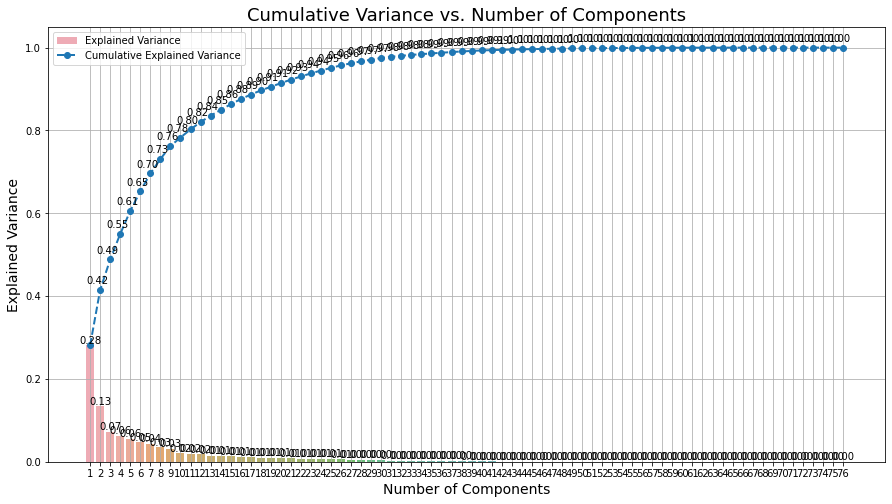

In [57]:
plt.figure(figsize=(15, 8)) 

# 각 성분의 설명된 분포에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 선 그래프
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# 눈금 및 범례 사용자 정의
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])  

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

로버스트 : 엘보우 포인트는 PC 8~9 부터 완만해지는 것으로 보여지며 PC 8부터 데이터의 70% 이상 포함

In [58]:
pca = PCA(8)

In [59]:
pd.DataFrame(pca.fit_transform(rs_df))

,0,1,2,3,4,5,6,7
0,-0.526253,-0.012883,0.517810,-0.171740,-0.078362,-0.264480,0.126948,-0.573044
1,0.844767,-0.977308,0.128929,1.018446,0.042474,0.074024,-0.016044,0.004659
2,1.350681,-0.089192,0.670393,-0.144470,0.163211,0.114308,0.360371,0.443945
3,0.715680,-0.648564,0.275103,0.541105,0.125732,0.103771,0.118778,0.109878
4,0.524320,-0.621389,0.601045,1.019560,-0.295358,-0.308242,-0.088016,-0.718631
...,...,...,...,...,...,...,...,...
3682,0.817468,-0.875772,-0.320566,-0.438810,-0.055378,-0.777747,0.313659,0.316182
3683,0.334708,1.050292,-0.183167,0.181537,0.519463,0.054940,0.137557,0.615437
3684,0.854790,1.522069,0.128501,0.237243,0.230255,-0.333845,0.033781,-0.085884
3685,2.120887,1.153706,0.554771,-0.132901,-0.911200,0.393991,0.239535,-0.114457


In [60]:
pca.explained_variance_ratio_.sum()

0.7310255829695562

### 4.4 민맥스 스케일링 및 PCA 시각화

In [69]:
# 민맥스 스케일링
mm_df = mm.fit_transform(car_df)

In [70]:
pca = PCA()
pca.fit(mm_df)

PCA()

In [71]:
pd.DataFrame(pca.transform(mm_df))

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,-0.078540,-0.176766,0.087935,0.354726,-0.089615,0.642637,0.243191,-0.042286,0.320513,0.022105,...,-6.011738e-16,-2.862864e-16,9.400772e-18,-1.511702e-17,-1.121852e-16,-9.615321e-17,-1.067236e-16,8.880924e-17,1.600507e-16,-8.901502e-17
1,-0.957671,0.964523,-0.061440,-0.016788,0.058895,0.033936,-0.015996,0.026376,-0.094960,-0.057615,...,2.028705e-16,6.412773e-17,-4.697774e-17,7.812436e-17,-6.719086e-17,-1.069952e-16,1.861019e-17,-6.124434e-17,3.491895e-18,-1.037602e-16
2,-0.499165,-0.235264,-0.135756,-0.165667,-0.170565,-0.180766,0.195729,-0.249606,1.053986,-0.165242,...,-1.657197e-17,-1.908766e-16,-1.675410e-16,-1.486907e-16,2.306504e-18,-4.153423e-16,1.817651e-17,6.799256e-17,8.459022e-17,2.648686e-16
3,-0.759565,0.483205,-0.108444,-0.078061,-0.032900,-0.012810,-0.013169,-0.019281,0.117488,-0.089191,...,7.363365e-17,2.462737e-16,-7.946463e-18,1.427428e-16,-1.503492e-16,-1.065615e-16,1.847100e-16,-2.026243e-16,1.520128e-17,7.231426e-17
4,-0.562699,0.989908,0.198214,0.474478,0.135285,0.722471,0.153879,-0.013879,-0.021315,-0.049677,...,9.184825e-17,-4.689458e-17,1.195557e-16,1.567432e-17,-8.106864e-17,4.027072e-18,-9.241212e-17,-7.512213e-17,4.512526e-17,7.262134e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,-0.534540,-0.420620,0.013028,0.332309,-0.860091,-0.325575,-0.235876,-0.022618,-0.128856,-0.109985,...,-7.121576e-17,2.471411e-16,-1.111625e-16,3.085315e-17,1.237371e-16,-1.030921e-16,1.361377e-16,4.717587e-17,-9.929047e-17,-1.202400e-16
3683,0.754788,0.156578,-0.574998,-0.251241,-0.076015,-0.528848,0.285015,0.756347,0.015911,-0.209987,...,-1.310637e-16,-5.209875e-17,-7.733540e-17,1.566206e-16,7.169544e-17,-9.417035e-18,4.298718e-18,9.574813e-17,-1.949319e-17,-2.277929e-16
3684,1.247917,0.215999,-0.389927,0.219947,0.012444,0.129369,0.400824,0.792391,0.084920,-0.731598,...,-1.518804e-16,1.035130e-17,1.169536e-16,-1.139963e-16,-2.544907e-17,1.328303e-16,-1.622347e-16,1.373815e-16,1.574486e-16,-6.472889e-17
3685,0.508882,-0.209121,0.925981,-0.160757,0.129576,0.449801,0.199045,0.566997,0.013766,0.479945,...,1.985337e-16,1.283125e-16,-2.876314e-17,-2.284880e-16,-1.711658e-16,-9.417035e-18,-1.651796e-17,-2.221306e-17,-1.825572e-16,-1.930984e-16


In [72]:
import matplotlib.pyplot as plt 

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

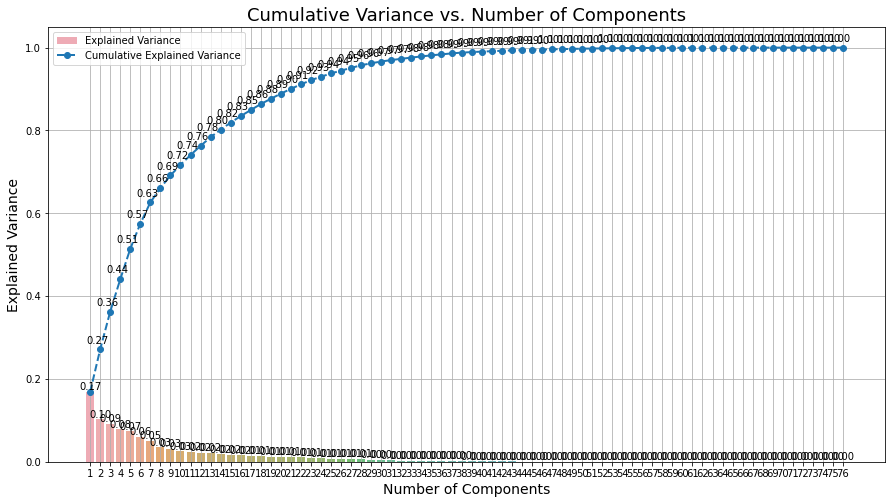

In [73]:
plt.figure(figsize=(15, 8)) 

# 각 성분의 설명된 분포에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 선 그래프
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# 눈금 및 범례 사용자 정의
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])  

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

민맥스 : 엘보우 포인트는 PC10부터 완만해지는 것으로 보여지며 PC 10부터 데이터의 70% 이상 포함

In [77]:
pca = PCA(10)

In [78]:
pd.DataFrame(pca.fit_transform(mm_df))

,0,1,2,3,4,5,6,7,8,9
0,-0.078544,-0.176773,0.087968,0.354697,-0.089569,0.642677,0.243058,-0.040771,0.323794,0.017091
1,-0.957672,0.964523,-0.061455,-0.016813,0.058886,0.033932,-0.015982,0.025954,-0.094238,-0.060162
2,-0.499165,-0.235269,-0.135791,-0.165640,-0.170535,-0.180739,0.195828,-0.250758,1.053674,-0.165527
3,-0.759557,0.483193,-0.108365,-0.077832,-0.032827,-0.012832,-0.013447,-0.017114,0.110014,-0.068661
4,-0.562699,0.989907,0.198177,0.474454,0.135267,0.722478,0.153915,-0.015057,-0.021206,-0.049416
...,...,...,...,...,...,...,...,...,...,...
3682,-0.534535,-0.420633,0.012922,0.332370,-0.860112,-0.325512,-0.235860,-0.025941,-0.134682,-0.083374
3683,0.754790,0.156578,-0.574888,-0.251150,-0.075982,-0.528860,0.284804,0.759733,0.014764,-0.207712
3684,1.247918,0.215997,-0.389944,0.219960,0.012449,0.129367,0.400828,0.791552,0.083350,-0.729586
3685,0.508871,-0.209101,0.926017,-0.160991,0.129497,0.449760,0.199189,0.568432,0.025140,0.444973


In [79]:
pca.explained_variance_ratio_.sum()

0.7168617707657593

### PCA 결과 : 이번 데이터는 로버스트 스케일링을 하였을 때 가장 좋은 결과를 얻을 수 있었습니다.

# 5. 회고

시간 분배를 생각하지 않고 전처리 과정에서 다양한 시도를 하며 <br/>
아직은 경험이 부족하다보니 현재 진행하고 있는 전처리가 정상적으로 되고 있는건지, 어느정도 수준까지 전처리가 진행되야하는지를 판단하지 못해 아쉬웠습니다<br/>
현업에서 진행한다면 전처리에 대한 소요시간과 목표 퍼포먼스를 계산하고 진행되야할 것 같아 앞으로는 이러한 부분을 조금씩 염두하고 진행해보면 좋겠다는 생각이 들었습니다.<br/>
<br/>
각 스케일링에 대한 방법은 실제 적용해보기 전까지는 차이점을 이해하기 어려웠으나 실제 적용 후 데이터 그래프를 확인해보니 모두 다른 모양으로 보여져 조금이나마 이해할 수 있게 되었고, 원핫인코딩에 많은 열을 추가하게 되면 오히려 데이터를 분석하기 어려워진다는 것을 느낄 수 있는 계기가 되었습니다.